# <h1 style="text-align: center; "><strong>Proceso de Análisis y Visualización</strong></h1>

Para el desarrollo de la fase III del proyecto seguiremos una metodología de vizualización de Datos usando Seaborn

In [160]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from matplotlib import colors
import geopandas as gpd
import seaborn as sns
import pandas as pd

desaparecidos = pd.read_csv("Datasets/desaparecidos_limpio.csv", index_col = 0)

### Desapariciones por departamento en el periodo 1986-2024

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\migue\AppData\Local\Temp\ipykernel_22656\531104242.py:1: SyntaxWarning: invalid escape sequence '\M'
  shp = gpd.read_file("ShapeDpto\MGN_ANM_DPTOS.shp")
C:\Users\migue\AppData\Local\Temp\ipykernel_22656\531104242.py:2: SyntaxWarning: invalid escape sequence '\d'
  desaparecidos = pd.read_excel("Datasets\desaparecidos_totales.xlsx")


En shapefile: ['18' '19' '86' '76' '94' '99' '85' '91' '97' '95']
En desaparecidos: ['05' '08' '11' '13' '15' '17' '18' '19' '20' '23']


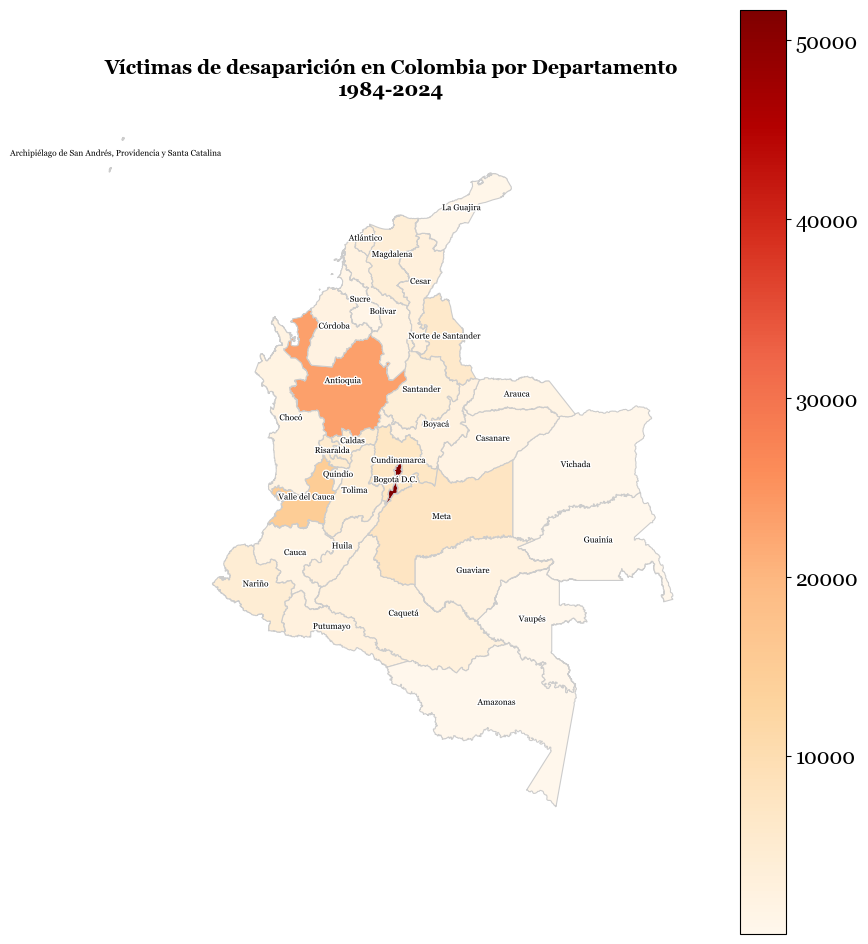

In [161]:
shp = gpd.read_file("ShapeDpto\MGN_ANM_DPTOS.shp")
desaparecidos = pd.read_excel("Datasets\desaparecidos_totales.xlsx")

# --- En tu DataFrame resumen_decada ---
# Asegurar que el código sea string y con 2 dígitos mínimo (ceros a la izquierda si es necesario)
desaparecidos["cod_dpto"] = (
    desaparecidos["cod_dpto"]
    .astype(str)
    .str.zfill(2)   # <- ajusta el número de dígitos según como esté en el shapefile
)

# --- En tu GeoDataFrame gdf ---
shp["DPTO_CCDGO"] = (
    shp["DPTO_CCDGO"]   # <-- usa el nombre real de la columna en tu shapefile
    .astype(str)
    .str.zfill(2)
)

# --- Verificar si coinciden ---
print("En shapefile:", shp["DPTO_CCDGO"].unique()[:10])
print("En desaparecidos:", desaparecidos["cod_dpto"].unique()[:10])

# --- Hacer el merge ---
gdf_merged = shp.merge(
    desaparecidos,
    left_on="DPTO_CCDGO",
    right_on="cod_dpto",
    how="left"
)

# Configurar fuente global
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 15

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Graficar coroplético
gdf_merged.plot(
    column="casos",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)

# Etiquetas en el centro de cada polígono
for idx, row in gdf_merged.iterrows():
    txt = ax.annotate(
        text=row["departamento"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=6, color="black"
    )
    # Buffer blanco alrededor del texto
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground="white"),
        path_effects.Normal()
    ])

# Título en dos líneas
ax.set_title(
    "Víctimas de desaparición en Colombia por Departamento\n"
    "1984-2024",
    fontsize=14, fontweight="bold"
)

ax.axis("off")
plt.show()

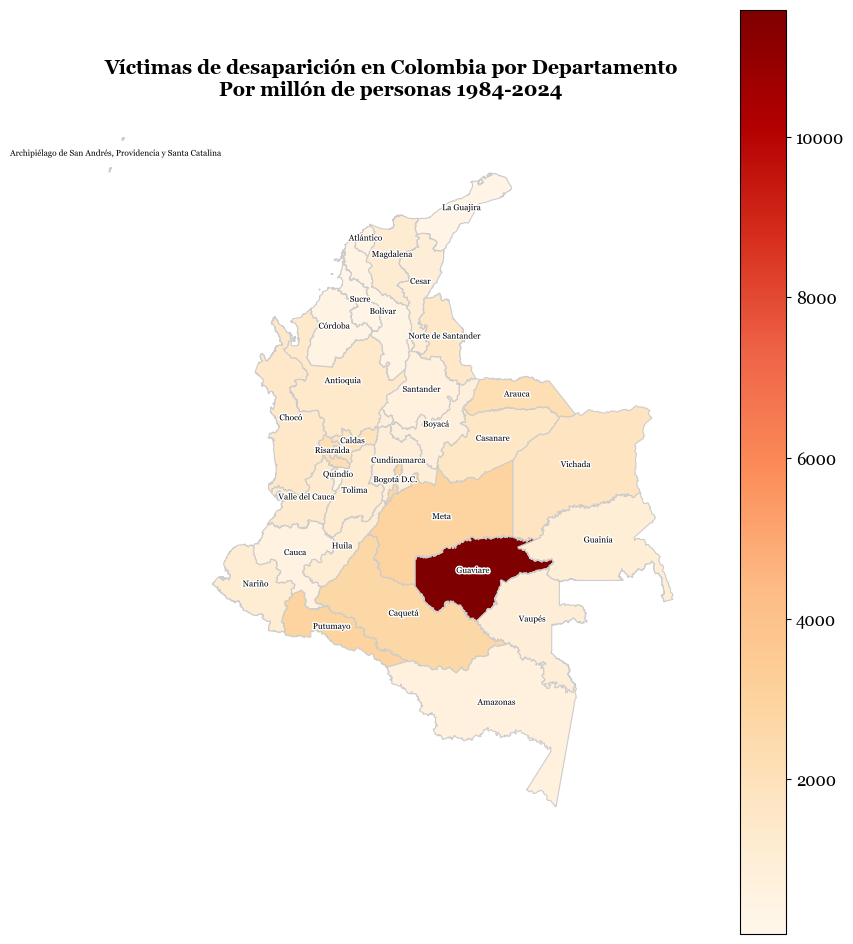

In [162]:
# Configurar fuente global
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 12

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Graficar coroplético
gdf_merged.plot(
    column="p_pob",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)

# Etiquetas en el centro de cada polígono
for idx, row in gdf_merged.iterrows():
    txt = ax.annotate(
        text=row["departamento"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=6, color="black"
    )
    # Buffer blanco alrededor del texto
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground="white"),
        path_effects.Normal()
    ])

# Título en dos líneas
ax.set_title(
    "Víctimas de desaparición en Colombia por Departamento\n"
    "Por millón de personas 1984-2024",
    fontsize=14, fontweight="bold"
)

ax.axis("off")
plt.show()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\migue\AppData\Local\Temp\ipykernel_22656\623983184.py:1: SyntaxWarning: invalid escape sequence '\d'
  desaparecidos = pd.read_excel("Datasets\desaparecidos_forzada1.xlsx")


En shapefile: ['18' '19' '86' '76' '94' '99' '85' '91' '97' '95']
En desaparecidos: ['05' '08' '11' '13' '15' '17' '18' '19' '20' '23']


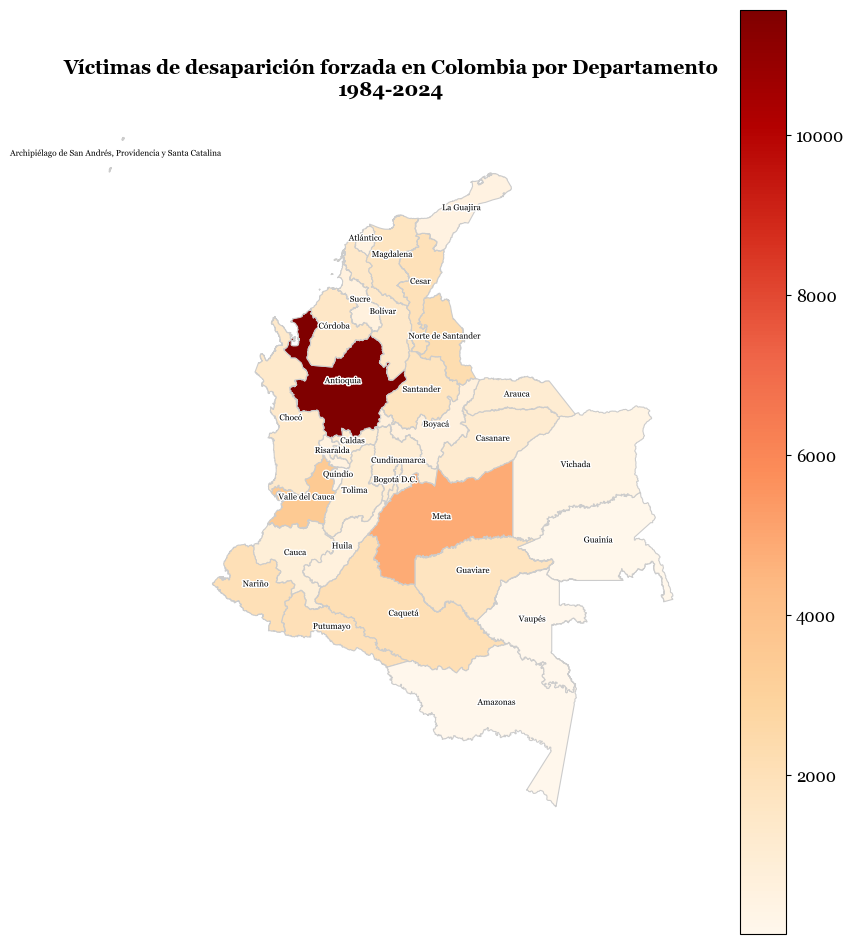

In [163]:
desaparecidos = pd.read_excel("Datasets\desaparecidos_forzada1.xlsx")

# --- En tu DataFrame resumen_decada ---
# Asegurar que el código sea string y con 2 dígitos mínimo (ceros a la izquierda si es necesario)
desaparecidos["cod_dpto"] = (
    desaparecidos["cod_dpto"]
    .astype(str)
    .str.zfill(2)   # <- ajusta el número de dígitos según como esté en el shapefile
)

# --- En tu GeoDataFrame gdf ---
shp["DPTO_CCDGO"] = (
    shp["DPTO_CCDGO"]   # <-- usa el nombre real de la columna en tu shapefile
    .astype(str)
    .str.zfill(2)
)

# --- Verificar si coinciden ---
print("En shapefile:", shp["DPTO_CCDGO"].unique()[:10])
print("En desaparecidos:", desaparecidos["cod_dpto"].unique()[:10])

# --- Hacer el merge ---
gdf_merged = shp.merge(
    desaparecidos,
    left_on="DPTO_CCDGO",
    right_on="cod_dpto",
    how="left"
)




# Configurar fuente global
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 12

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Graficar coroplético
gdf_merged.plot(
    column="casos_f",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)

# Etiquetas en el centro de cada polígono
for idx, row in gdf_merged.iterrows():
    txt = ax.annotate(
        text=row["departamento"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=6, color="black"
    )
    # Buffer blanco alrededor del texto
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground="white"),
        path_effects.Normal()
    ])

# Título en dos líneas
ax.set_title(
    "Víctimas de desaparición forzada en Colombia por Departamento\n"
    "1984-2024",
    fontsize=14, fontweight="bold"
)

ax.axis("off")
plt.show()

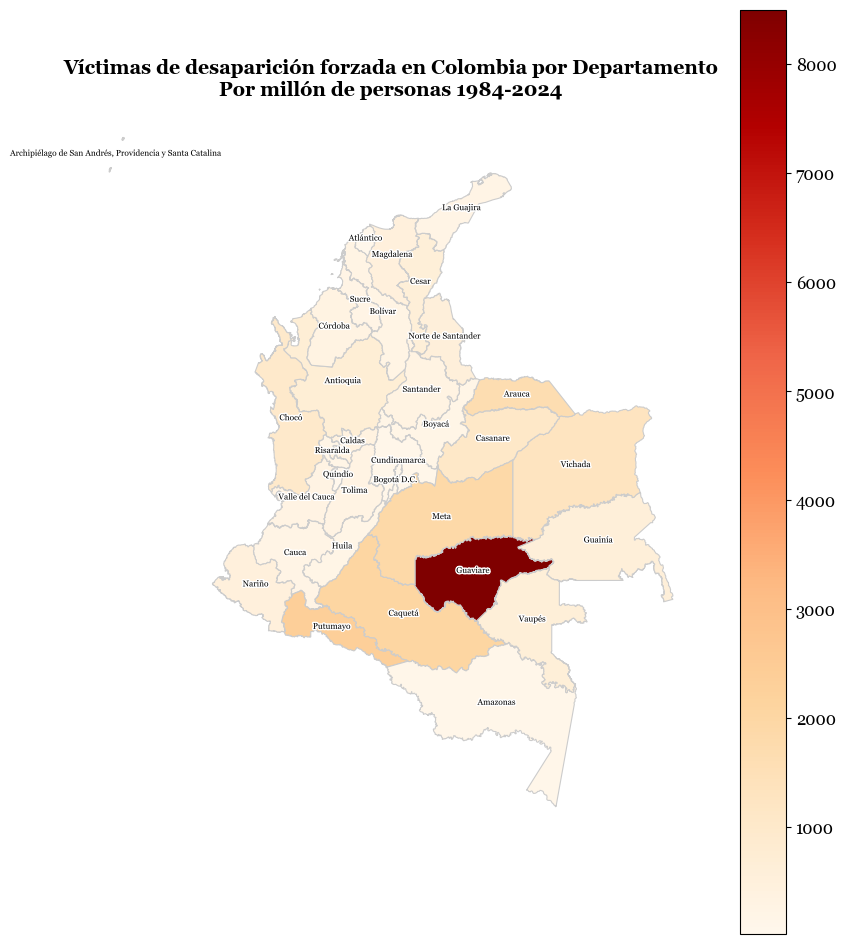

In [164]:
# Configurar fuente global
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 12

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Graficar coroplético
gdf_merged.plot(
    column="p_pob_f",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)

# Etiquetas en el centro de cada polígono
for idx, row in gdf_merged.iterrows():
    txt = ax.annotate(
        text=row["departamento"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=6, color="black"
    )
    # Buffer blanco alrededor del texto
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground="white"),
        path_effects.Normal()
    ])

# Título en dos líneas
ax.set_title(
    "Víctimas de desaparición forzada en Colombia por Departamento\n"
    "Por millón de personas 1984-2024",
    fontsize=14, fontweight="bold"
)

ax.axis("off")
plt.show()

### Aumento de desaparecidos por periodo presidencial:

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\migue\AppData\Local\Temp\ipykernel_22656\831275197.py:1: SyntaxWarning: invalid escape sequence '\d'
  desaparecidos = pd.read_csv("Datasets\desaparecidos_limpio.csv")


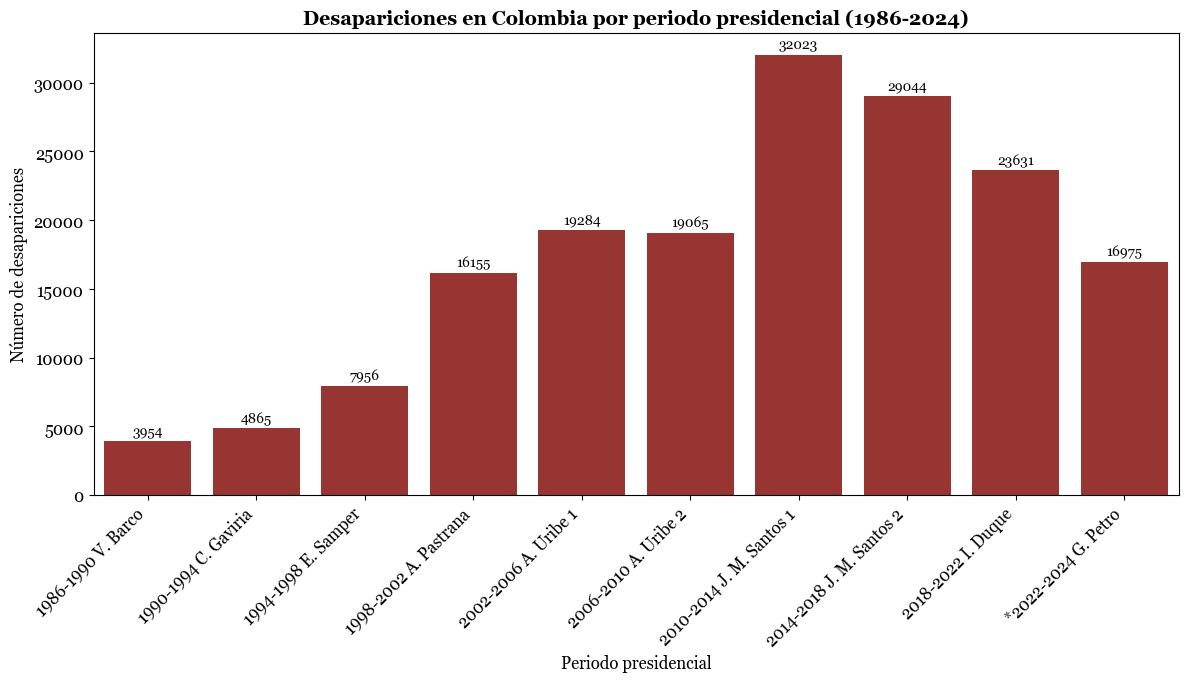

In [165]:
desaparecidos = pd.read_csv("Datasets\desaparecidos_limpio.csv")
# --- Agrupar por periodo presidencial ---
desap_por_periodo = (
    desaparecidos.groupby("Periodo presidencial")
    .size()
    .reset_index(name="casos")
)

# 🔧 Mantener orden cronológico
orden_cronologico = [
    "1986-1990 V. Barco",
    "1990-1994 C. Gaviria",
    "1994-1998 E. Samper",
    "1998-2002 A. Pastrana",
    "2002-2006 A. Uribe 1",
    "2006-2010 A. Uribe 2",
    "2010-2014 J. M. Santos 1",
    "2014-2018 J. M. Santos 2",
    "2018-2022 I. Duque",
    "*2022-2024 G. Petro"
]

desap_por_periodo["Periodo presidencial"] = pd.Categorical(
    desap_por_periodo["Periodo presidencial"],
    categories=orden_cronologico,
    ordered=True
)

desap_por_periodo = desap_por_periodo.sort_values("Periodo presidencial")

# --- Color único (rojo institucional) ---
base_color = (168/255, 37/255, 33/255)  # rojo oscuro

# --- Configuración de tipografía ---
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 12

# --- Graficar ---
plt.figure(figsize=(14,6))
ax = sns.barplot(
    data=desap_por_periodo,
    x="Periodo presidencial", 
    y="casos",
    color=base_color   # 👈 todas las barras mismo color
)

# --- Añadir valores encima de las barras ---
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10, color="black")

# Ajustes visuales
plt.xticks(rotation=45, ha="right")
plt.title("Desapariciones en Colombia por periodo presidencial (1986-2024)", fontsize=14, fontweight="bold")
plt.ylabel("Número de desapariciones")
plt.xlabel("Periodo presidencial")

plt.show()



### Aumento de desaparecidos forzosamente por periodo presidencial:

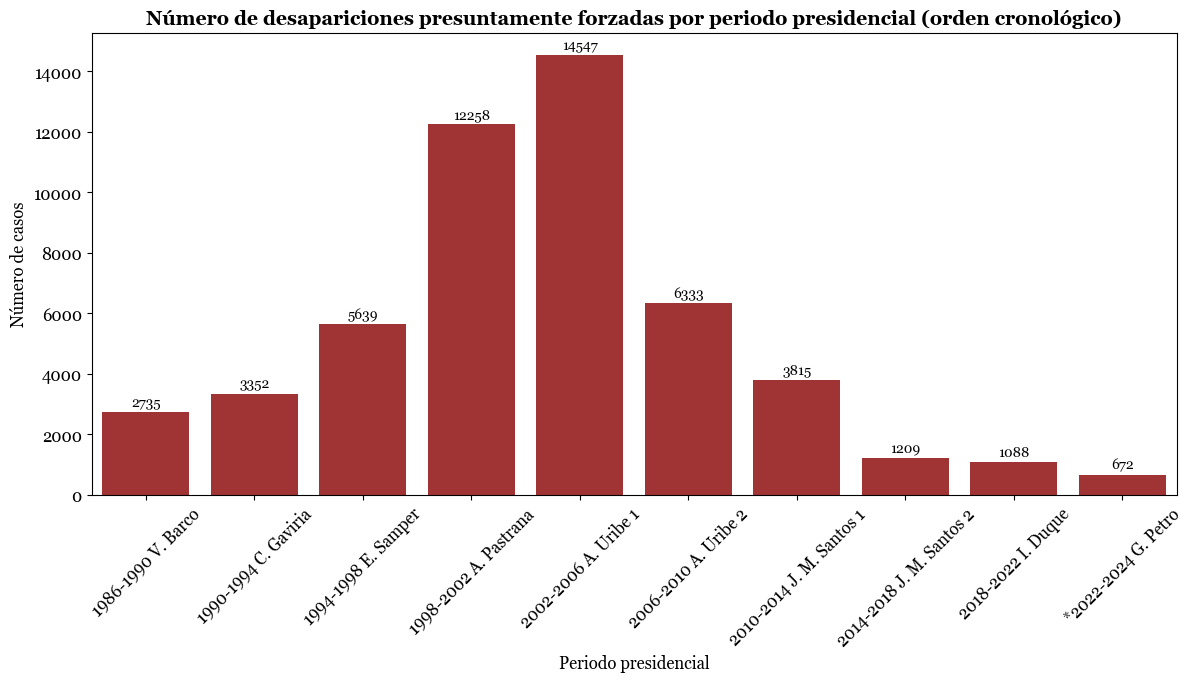

In [166]:
desaparecidos_f = desaparecidos[desaparecidos["Clasificación de la desaparición"] == "Desaparicion Presuntamente Forzada"]

# 👇 Configurar tipografía global
plt.rcParams['font.family'] = 'Georgia'

plt.figure(figsize=(14,6))

# 👇 Usar un solo color (ejemplo: rojo oscuro)
ax = sns.countplot(
    data=desaparecidos_f, 
    x="Periodo presidencial", 
    order=orden_cronologico, 
    color="firebrick"   # 👈 mismo color para todas las barras
)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10, color="black")

plt.xticks(rotation=45)
plt.title("Número de desapariciones presuntamente forzadas por periodo presidencial (orden cronológico)", fontsize=14, weight='bold')
plt.ylabel("Número de casos", fontsize=12)
plt.xlabel("Periodo presidencial", fontsize=12)
plt.show()




### Estado actual de la desaparición por género

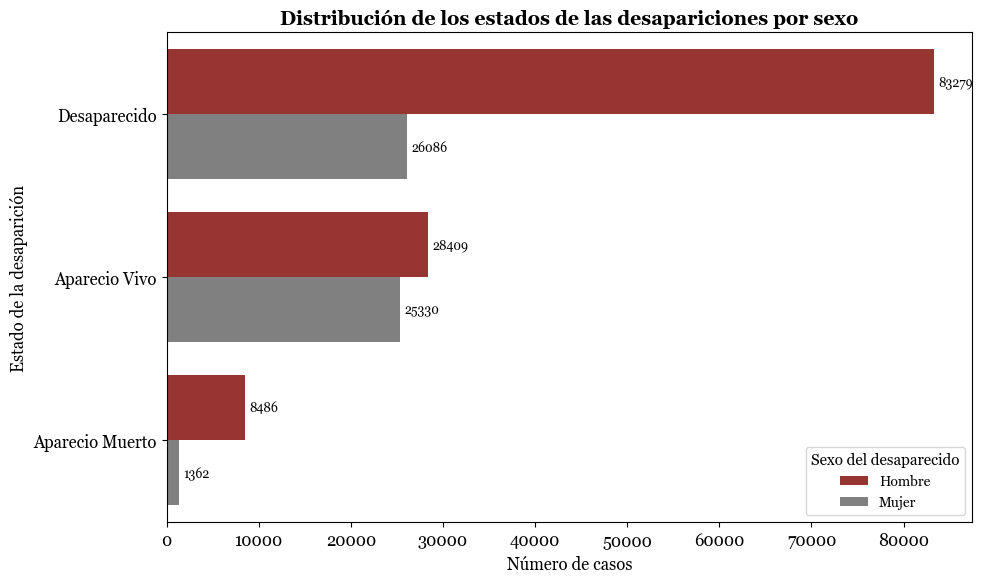

In [167]:


# --- Configuración ---
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 12

# Color institucional (rojo oscuro)
base_color = (168/255, 37/255, 33/255)

plt.figure(figsize=(10,6))

ax = sns.countplot(
    data=desaparecidos,
    y="Estado de la desaparición",
    order=desaparecidos["Estado de la desaparición"].value_counts().index,
    hue="Sexo del desaparecido",             
    palette=[base_color, "gray"]   # 👈 rojo para un sexo, gris para el otro
)

# Añadir etiquetas con los valores
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, color="black")

# Título y etiquetas
plt.title("Distribución de los estados de las desapariciones por sexo", fontsize=14, fontweight="bold")
plt.xlabel("Número de casos")
plt.ylabel("Estado de la desaparición")

# Leyenda
plt.legend(title="Sexo del desaparecido", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


### Clasificación de desaparición por género

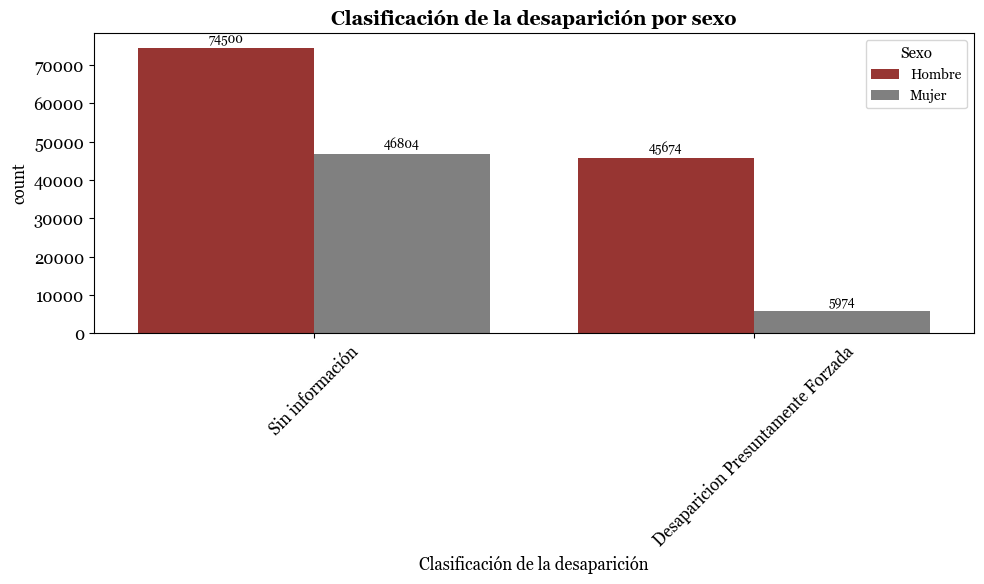

In [168]:

# --- Configuración ---
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 12

# Colores: rojo institucional + gris
palette_custom = [(168/255, 37/255, 33/255), "gray"]

plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=desaparecidos, 
    x="Clasificación de la desaparición", 
    hue="Sexo del desaparecido",
    palette=palette_custom
)

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Título
plt.title("Clasificación de la desaparición por sexo", fontsize=14, fontweight="bold")

# Etiquetas con valores en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=9, color="black")

# Leyenda
plt.legend(title="Sexo", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()



### Distribución de desaparecidos por edad y sexo

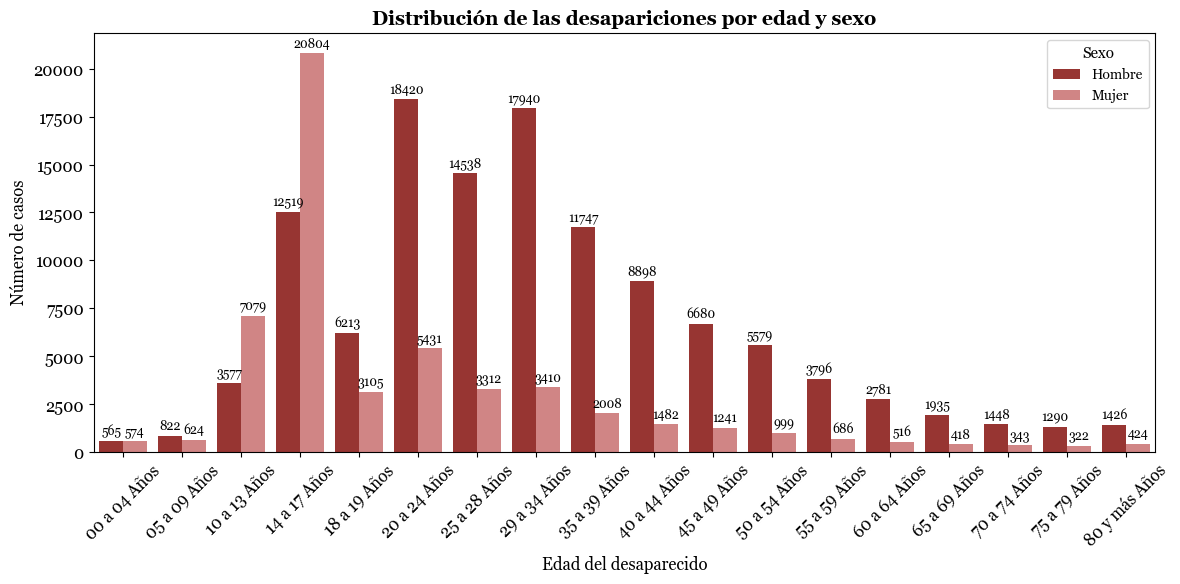

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuración global ---
plt.rcParams["font.family"] = "Georgia"
plt.rcParams["font.size"] = 12

# Color base (rojo institucional)
base_color = (168/255, 37/255, 33/255)

plt.figure(figsize=(12,6))

# Ordenar las edades en orden ascendente
orden_edades = sorted(desaparecidos["Grupo de edad judicial del desaparecido"].unique())

# Graficar: separa por sexo, pero mantiene la misma paleta basada en el color institucional
ax = sns.countplot(
    data=desaparecidos,
    x="Grupo de edad judicial del desaparecido",
    order=orden_edades,
    hue="Sexo del desaparecido",
    palette=[base_color, (220/255, 120/255, 120/255)]  # 👈 tonalidades coherentes
)

# Etiquetas encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=9, color="black")

# Ajustes visuales
plt.xticks(rotation=45)
plt.title("Distribución de las desapariciones por edad y sexo", fontsize=14, fontweight="bold")
plt.xlabel("Edad del desaparecido")
plt.ylabel("Número de casos")

# Mostrar leyenda
plt.legend(title="Sexo", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

